In [2]:
%reload_ext autoreload
%autoreload 2

from polyfit import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sbn

In [3]:
from cross_validation import *


In [4]:
data = np.genfromtxt('./non_gaussian.csv', delimiter=',')
X, Y = data[:, 0], data[:, 1]
X, Y = zip(*sorted(zip(X, Y)))
X,Y=np.array(X),np.array(Y)

In [5]:
degrees = np.arange(0, 21)
piv_models = []
for degree in degrees:
    model = polyfit(degree=degree, method='piv')
    model.fit(X, Y)
    piv_models.append(model)


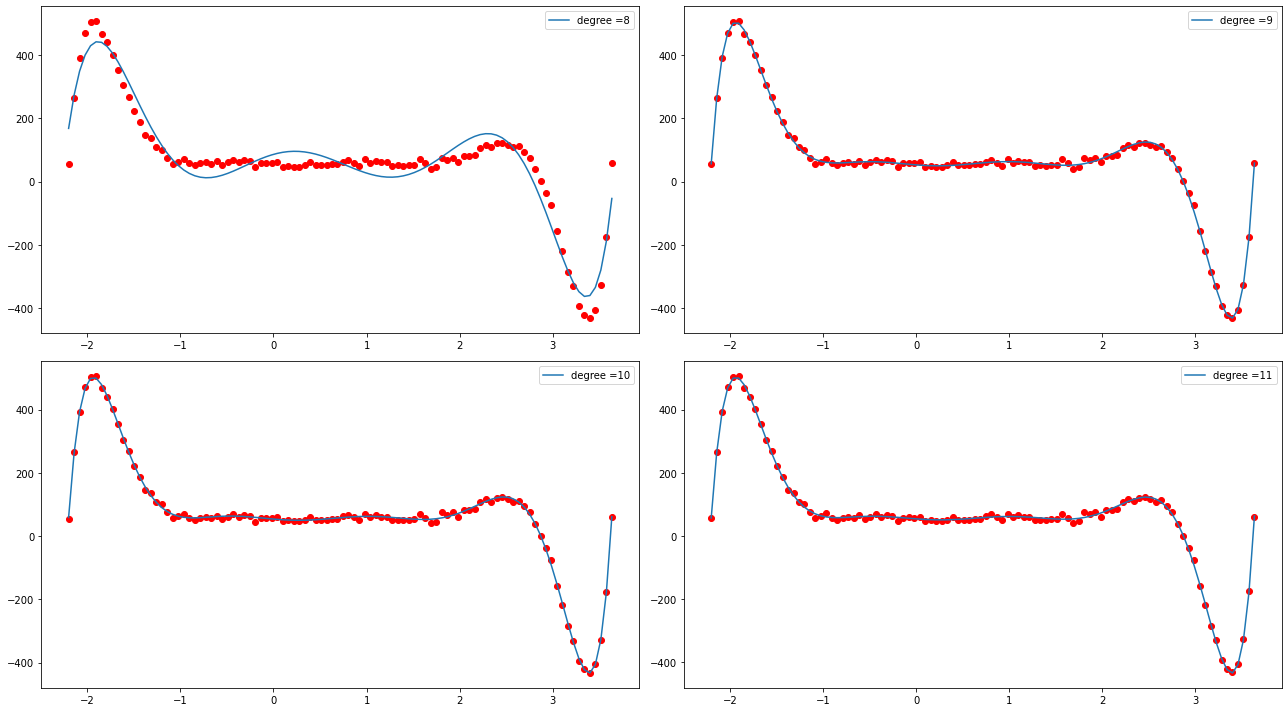

In [6]:
#After training lets plot all the curves
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = np.array(axes)

#Plotting curves

for i, ax in zip([8,9,10,11], np.reshape(axes, -1)):
    ax.scatter(X, Y, label='Actual Distrib', color='red')
    ax.plot(np.sort(X), piv_models[i].pred(
        np.sort(X)), label='degree ='+str(piv_models[i].degree))
    ax.legend(['degree ='+str(piv_models[i].degree)])
plt.tight_layout()
plt.show()


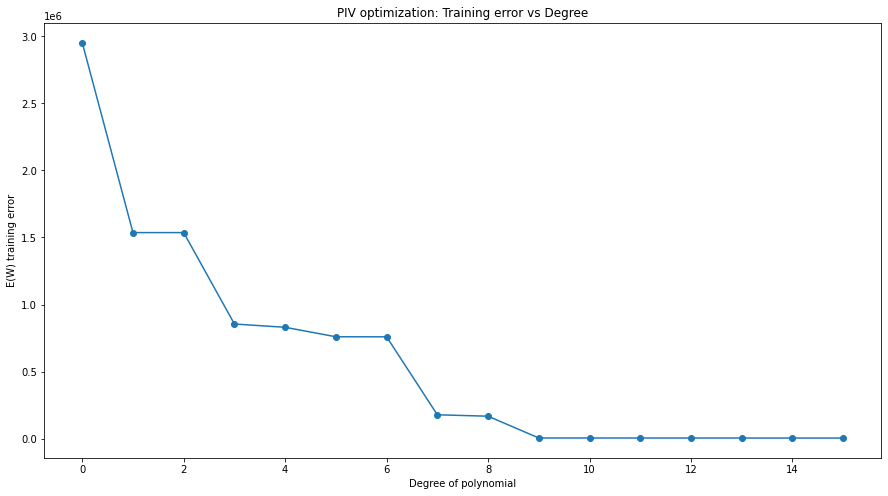

In [7]:
piv_error = [piv_model.train_error for piv_model in piv_models[:16]]
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, len(piv_error)), (piv_error), '-o')

plt.title("PIV optimization: Training error vs Degree"), plt.xlabel(
    "Degree of polynomial"), plt.ylabel("E(W) training error")
plt.show()


Clearly polynomial of degree>=9 fits the curve nicely

In [8]:
X.shape

(100,)

In [9]:
#Maximum Likelihood i.e (Without regularization , tuning the degree)
test_err, train_err =[] , []
posssible_degree = np.arange(0, 14, 1)
indices =np.arange(0,)
for degree in posssible_degree:
    # print(kfold_cross_validation(X, Y, degree=degree, method='piv', K=10))
    mse_train,mse_test=kfold_cross_validation(X,Y,degree=degree,method='piv',K=10)
    test_err.append(mse_test),train_err.append(mse_train)    



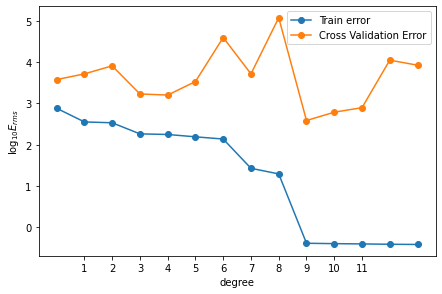

In [10]:
plt.plot(posssible_degree,np.log(train_err),'-o')
plt.plot(posssible_degree,np.log(test_err),'-o')
plt.tight_layout()
plt.legend(['Train error','Cross Validation Error'])
plt.xlabel('degree'),plt.ylabel('$\log_{10}{E_{rms}}$')
plt.xticks(np.arange(1,12,1))
plt.show()


Using regularization in our model

In [11]:
X.shape,Y.shape

((100,), (100,))

In [32]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(8, 13, 1)
lmda = [10**i for i in range(-2, -15, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        train_err, test_err = shuffled_cvr(
            X, Y, degree=degree, K=10, lmda=lm, method='piv')
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


,lmda,degree,test_err,train_err
18,1.000000e-11,9,2.187783,0.686303
23,1.000000e-10,9,2.198363,0.686405
33,1.000000e-08,9,2.200270,0.686434
3,1.000000e-14,9,2.205133,0.686337
28,1.000000e-09,9,2.207801,0.686381
13,1.000000e-12,9,2.208485,0.686137
38,1.000000e-07,9,2.213284,0.686350
8,1.000000e-13,9,2.218115,0.686225
35,1.000000e-07,12,2.222088,0.665190
43,1.000000e-06,9,2.224840,0.689963


degree=11 work great

In [276]:
lmda = [10**i for i in range(-1, -10, -1)]
mse_train_total, mse_test_total = [], []
for lm in lmda:
    
    mse_train, mse_test = kfold_cross_validation(
    X[indices], Y[indices], degree=9, method='piv', K=10, lmda=lm)
    mse_test_total.append(mse_test), mse_train_total.append(mse_train)



degree=11
lmda=1e-6

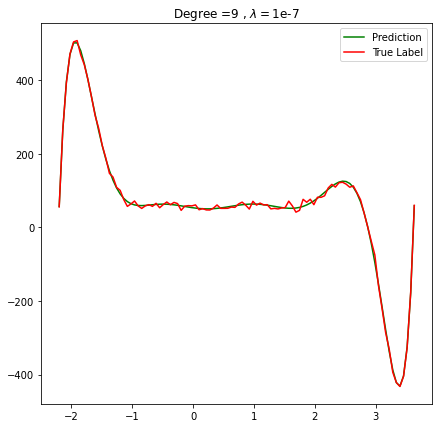

In [35]:
plt.figure(figsize=(7,7))
model= polyfit(degree=9,method='piv',lmda=1e-7)
model.fit(X,Y)
hx= np.ravel(model.pred(X))
plt.plot(X,model.pred(X),color='green',label='Prediction')
plt.title("Degree =9 , $\lambda=$1e-7")
plt.plot(X, Y, color='red', label='True Label')
plt.legend()
plt.show()


Thus degree=9 fits nicely, increasing the degreee would only lead to increase in complexity . 

In [289]:
noise= np.ravel(hx)-np.ravel(Y)
print(np.mean(noise))


-6.65686718797076e-07


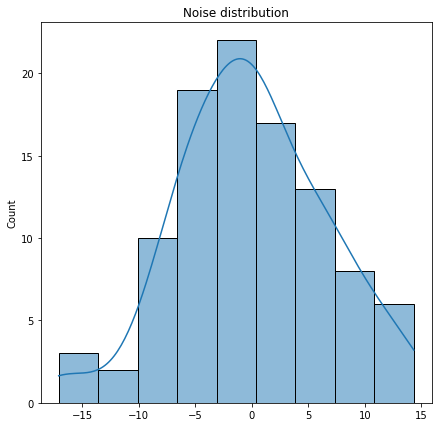

In [288]:
np.mean(noise)
fig,ax = plt.subplots(figsize=(7,7))
sbn.histplot(noise,kde=True,ax=ax)
# plt.xscale(5)
# plt.xticks(np.arange(-22,22,1))
plt.title("Noise distribution")
plt.show()


In [292]:
normalized_noise=noise/(40)


Sort of beta distribution
mean=0
mode=0


mean = (alpha)/(alpha+beta)
mode=(alpha-1)/(alpha+beta-2)
since aplha

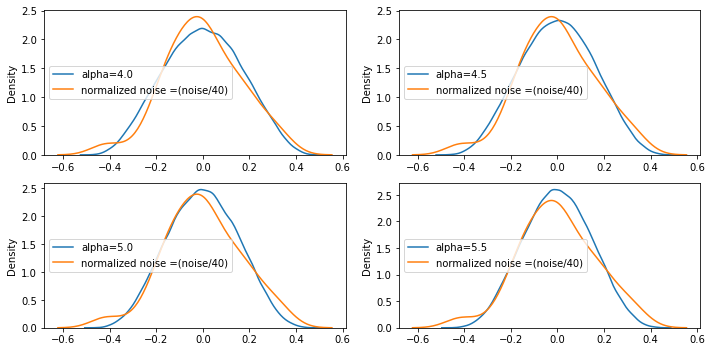

In [295]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axes=np.array(axes)

for alpha ,ax in zip(np.arange(4,6,0.5),np.reshape(axes,-1)):
    # generate points from alpha distribution
    # fig, ax = plt.subplots()
    distrib = (np.random.beta(alpha,alpha,100000)-0.5)
    sbn.kdeplot(distrib,ax=ax,label="alpha="+str(alpha))
    sbn.kdeplot(normalized_noise, ax=ax, label="normalized noise =(noise/40)")
    ax.legend()
plt.tight_layout()


Good estimate of the noise in model
Noice =40 (beta(4.5,4.5)-0.5)